# Console Game Data-Analysis

The goal is to figure out what qualities make a video game have the best rating and have the highest sales.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

# Data Overview & Import

In [2]:
#Import of Data and Dropping null values

games_df = pd.read_csv("video_games.csv")
games_df = games_df.dropna()
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 948 entries, 0 to 1205
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Title                          948 non-null    object 
 1   Features.Handheld?             948 non-null    bool   
 2   Features.Max Players           948 non-null    int64  
 3   Features.Multiplatform?        948 non-null    bool   
 4   Features.Online?               948 non-null    bool   
 5   Metadata.Genres                948 non-null    object 
 6   Metadata.Licensed?             948 non-null    bool   
 7   Metadata.Publishers            948 non-null    object 
 8   Metadata.Sequel?               948 non-null    bool   
 9   Metrics.Review Score           948 non-null    int64  
 10  Metrics.Sales                  948 non-null    float64
 11  Metrics.Used Price             948 non-null    float64
 12  Release.Console                948 non-null    object 

In [3]:
games_df.describe()

,Features.Max Players,Metrics.Review Score,Metrics.Sales,Metrics.Used Price,Release.Year,Length.All PlayStyles.Average,Length.All PlayStyles.Leisure,Length.All PlayStyles.Median,Length.All PlayStyles.Polled,Length.All PlayStyles.Rushed,...,Length.Main + Extras.Average,Length.Main + Extras.Leisure,Length.Main + Extras.Median,Length.Main + Extras.Polled,Length.Main + Extras.Rushed,Length.Main Story.Average,Length.Main Story.Leisure,Length.Main Story.Median,Length.Main Story.Polled,Length.Main Story.Rushed
count,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,...,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000
mean,1.720464,69.681435,0.562099,17.335021,2006.746835,13.561094,25.469532,11.012746,48.676160,9.178956,...,12.741421,17.963098,12.219075,15.483122,10.366051,8.495394,11.075686,8.336463,27.493671,6.987043
std,1.263960,12.739357,1.173686,5.182464,1.059597,20.066423,47.401659,13.121404,168.356926,10.746951,...,24.952818,37.080044,24.538082,62.253465,22.089844,9.635261,14.037045,9.483356,95.574818,7.862118
min,1.000000,25.000000,0.010000,4.950000,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,61.750000,0.110000,14.950000,2006.000000,3.833333,4.591667,3.558333,1.000000,2.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.575000,0.637500,0.462500,1.000000,0.379167
50%,1.000000,71.000000,0.250000,16.950000,2007.000000,8.875000,12.000000,8.000000,6.000000,6.816667,...,7.633333,8.458333,7.375000,1.000000,6.516667,6.583333,8.066667,6.716667,4.000000,5.400000
75%,2.000000,80.000000,0.500000,17.950000,2008.000000,15.883333,27.050000,13.100000,27.000000,11.075000,...,16.000000,20.908333,15.000000,7.000000,12.850000,11.087500,14.641667,11.000000,16.000000,9.312500
max,8.000000,98.000000,14.660000,49.950000,2008.000000,279.733333,445.200000,126.000000,2300.000000,120.200000,...,291.000000,352.316667,291.000000,1100.000000,291.000000,72.383333,135.583333,70.000000,1100.000000,70.000000


In [4]:
publsiher = games_df["Metadata.Publishers"]

publsiher_counts = games_df["Metadata.Publishers"].value_counts()
print(publsiher_counts)

Metadata.Publishers
EA                      165
Ubisoft                  92
Activision               87
Nintendo                 85
Sega                     75
THQ                      61
Sony                     60
2K                       49
Konami                   47
Capcom                   35
Namco                    33
SquareEnix               31
Midway                   23
Eidos                    22
Microsoft                21
Atari                    20
Rockstar                 12
Disney                   10
Atari,Namco               4
Nintendo,Sega             2
Sony,Ubisoft              2
Namco,Sony                2
EA,Namco                  2
Capcom,Rockstar           1
Nintendo,SquareEnix       1
EA,Sony                   1
Microsoft,SquareEnix      1
Activision,Sony           1
Capcom,Nintendo           1
Activision,Konami         1
Namco,Ubisoft             1
Name: count, dtype: int64


In [5]:
console = games_df["Release.Console"]

console_counts = games_df["Release.Console"].value_counts()
print(console_counts)

Release.Console
X360             239
Nintendo DS      227
Sony PSP         190
PlayStation 3    153
Nintendo Wii     139
Name: count, dtype: int64


# Statistcal-Analysis & Charts/Figures

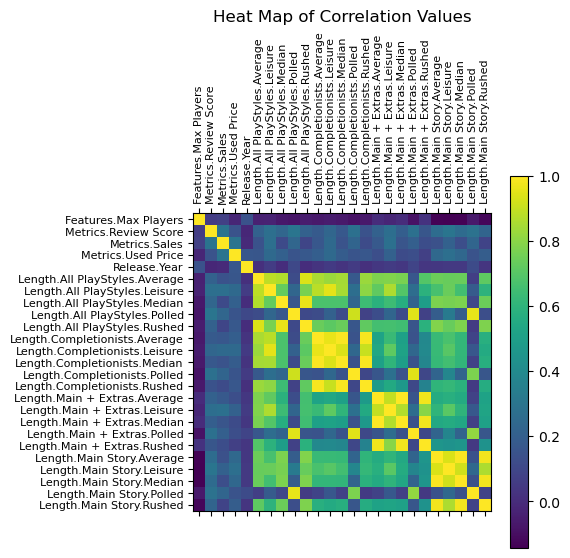

In [6]:
numeric_corrs = games_df.select_dtypes(include=['number'])
corr_scores = numeric_corrs.corr()
#print(corr_scores)
plt.matshow(corr_scores)
num_labels = len(corr_scores.index)
plt.colorbar()
plt.xticks(ticks=range(num_labels), labels=corr_scores.index, rotation=90, fontsize = 8)
plt.yticks(ticks=range(num_labels), labels=corr_scores.index, fontsize = 8)
plt.title("Heat Map of Correlation Values")
plt.savefig("FigureFooFighters.png",bbox_inches="tight")


Text(0.5, 1.0, 'Violin Plot of Review Score')

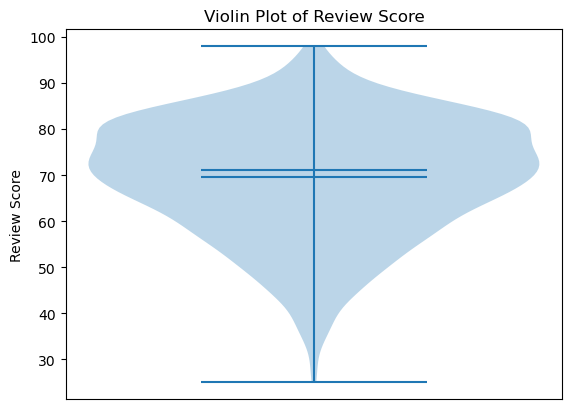

In [7]:
# Source: https://matplotlib.org/stable/plot_types/stats/violin.html#sphx-glr-plot-types-stats-violin-py
# A Violin plot combines boxplot and density plot data into one plot

fig, ax = plt.subplots()

vp = ax.violinplot(games_df["Metrics.Review Score"],showmeans=True, showmedians=True, showextrema=True)
plt.xticks([])

plt.ylabel("Review Score")
plt.title("Violin Plot of Review Score")

Text(0.5, 0, 'Console of Release')

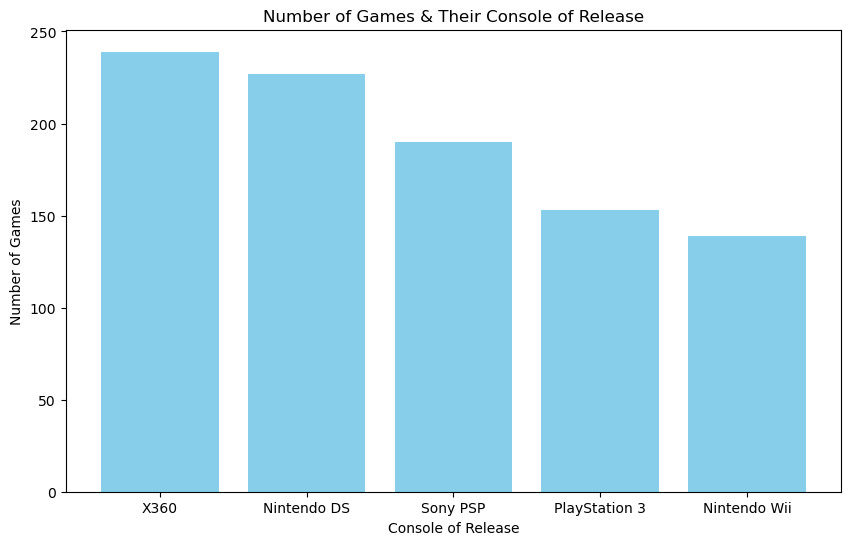

In [8]:
console_counts = games_df["Release.Console"].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(console_counts.index, console_counts.values, color="skyblue")
plt.title("Number of Games & Their Console of Release")
plt.ylabel("Number of Games")
plt.xlabel("Console of Release")

In [9]:
t_stat = stats.ttest_ind(games_df["Metrics.Sales"],games_df["Length.All PlayStyles.Average"])

print(t_stat)


TtestResult(statistic=-19.91142506400542, pvalue=2.9793546089726485e-80, df=1894.0)


Text(12, 45.5, 'y=2.46x+12.17')

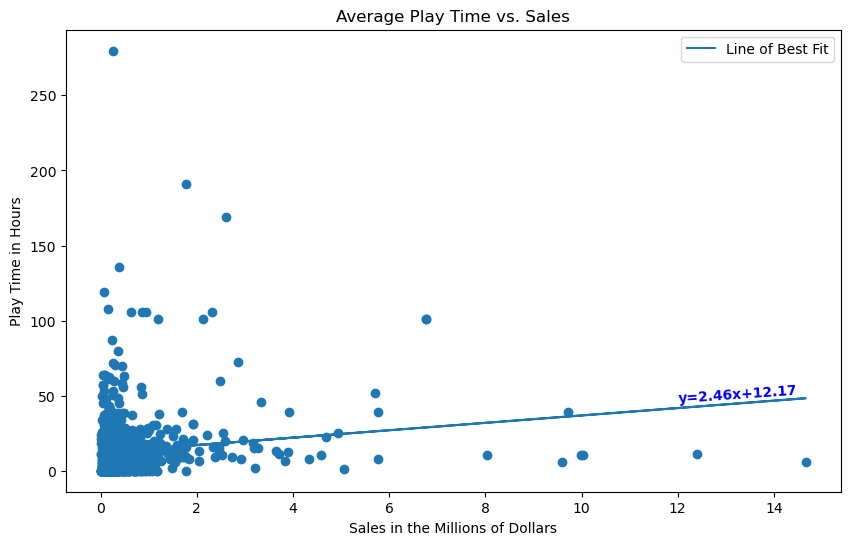

In [10]:
linear_model = scipy.stats.linregress(games_df["Metrics.Sales"],games_df["Length.All PlayStyles.Average"])
#print(linear_model)
slope = linear_model.slope
y_intercept = linear_model.intercept

linear_fit = slope*games_df["Metrics.Sales"]+y_intercept

plt.figure(figsize=(10, 6))
plt.scatter(games_df["Metrics.Sales"],games_df["Length.All PlayStyles.Average"])
plt.plot(games_df["Metrics.Sales"],linear_fit, label="Line of Best Fit")
plt.title("Average Play Time vs. Sales")
plt.xlabel("Sales in the Millions of Dollars")
plt.ylabel("Play Time in Hours")
plt.legend()
plt.text(12,45.5,"y=2.46x+12.17", color="blue", fontweight="bold", rotation=4)
#plt.savefig("FigureFooFighters.png")


A T-Statistic of -19.91 indicates a significant difference between two groups of data. A P-Value of 2.98E-80 Indicated statistical Signcificants. This is proven within the graph.

In [11]:
crosstab = pd.crosstab(games_df["Metrics.Review Score"], games_df["Length.All PlayStyles.Average"])
c, p, dof, expected = scipy.stats.chi2_contingency(crosstab)
print(p)

3.133982787655969e-10


Text(0, 0.5, 'Mean Review Score')

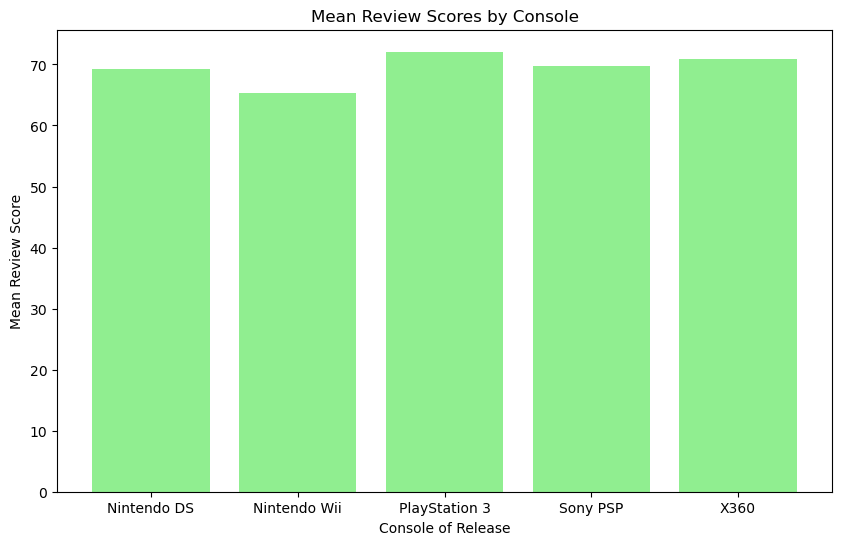

In [12]:
mean_review_scores = games_df.groupby("Release.Console")["Metrics.Review Score"].mean()
plt.figure(figsize=(10, 6))
plt.bar(mean_review_scores.index, mean_review_scores.values, color="lightgreen")
plt.title("Mean Review Scores by Console")
plt.xlabel("Console of Release")
plt.ylabel("Mean Review Score")

In [13]:
games_df["Release.Console"] = pd.Categorical(games_df["Release.Console"])
games_df["Release.Console.Codes"] = games_df["Release.Console"].cat.codes
games_df["Release.Console.Codes"]

0       0
1       3
2       0
3       3
4       0
       ..
1195    0
1197    3
1199    3
1204    0
1205    0
Name: Release.Console.Codes, Length: 948, dtype: int8

In [14]:
games_df["Metrics.Review Score"].mean()

69.68143459915612

In [15]:
def mapper (x):
    if x<=70:
        return 1
    else:
        return 2
    

games_df["Metrics.ReviewScore.Mapped"] = games_df["Metrics.Review Score"].map(lambda x : mapper(x))
games_df["Metrics.ReviewScore.Mapped"]

0       2
1       2
2       2
3       2
4       1
       ..
1195    1
1197    1
1199    1
1204    1
1205    1
Name: Metrics.ReviewScore.Mapped, Length: 948, dtype: int64

In [41]:
x = games_df[["Metrics.Sales", "Release.Console.Codes"]]
y = games_df["Metrics.ReviewScore.Mapped"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20)

Text(0, 0.5, 'Percent of Accurate Predictions')

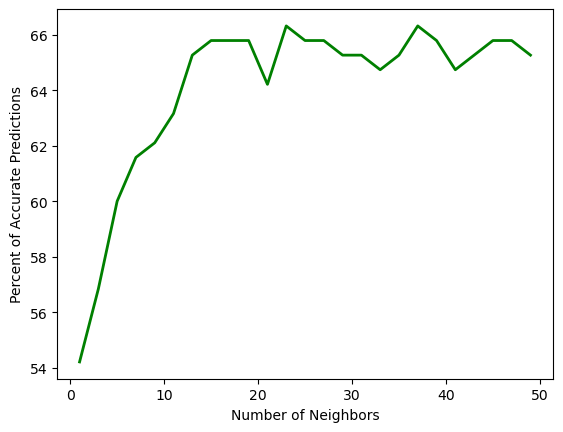

In [55]:
k_values = []
accuracy_scores = []
for k in range(1,50, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(x_train, y_train)
    prediction = classifier.predict(x_test)
    accuracy = accuracy_score(y_test, prediction)
    k_values.append(k)
    accuracy_scores.append(accuracy*100)
plt.plot(k_values, accuracy_scores, linewidth=2, color="GREEN")
plt.xlabel("Number of Neighbors")
plt.ylabel("Percent of Accurate Predictions")

Accuracy: 65.26315789473685


Text(0.5, 1.0, 'Accuracy of K-Nearest Neighbors Algorithm')

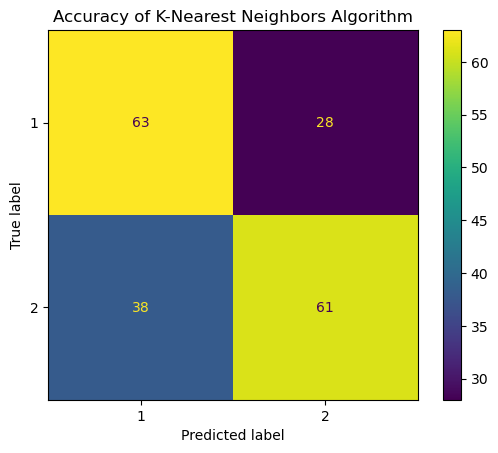

In [56]:
classifer = KNeighborsClassifier(n_neighbors=15)
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy*100)
ConfusionMatrixDisplay.from_estimator(classifier, x_test, y_test)
plt.title("Accuracy of K-Nearest Neighbors Algorithm")